In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv('AWS_Honeypot_marx-geo.csv')

In [36]:
data['attacker'] =[1]*data.shape[0]
data.head()

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15,attacker
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN,1
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,NaN,1
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN,1
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,NaN,1
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,NaN,1


In [37]:
data['datetime'] = pd.to_datetime(data['datetime'],format='%m/%d/%y %H:%M')

In [38]:
data['year'] = pd.DatetimeIndex(data['datetime']).year
data['month'] = pd.DatetimeIndex(data['datetime']).month
data['day'] = pd.DatetimeIndex(data['datetime']).day
data['hour'] = pd.DatetimeIndex(data['datetime']).hour
data['minute'] = pd.DatetimeIndex(data['datetime']).minute

In [39]:
data.head()

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,...,postalcode,latitude,longitude,Unnamed: 15,attacker,year,month,day,hour,minute
0,2013-03-03 21:53:00,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,...,NaN,28.5500,115.9333,NaN,1,2013,3,3,21,53
1,2013-03-03 21:57:00,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,...,NaN,51.0000,9.0000,NaN,1,2013,3,3,21,57
2,2013-03-03 21:58:00,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,...,NaN,25.0392,121.5250,NaN,1,2013,3,3,21,58
3,2013-03-03 21:58:00,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,...,97124,45.5848,-122.9117,NaN,1,2013,3,3,21,58
4,2013-03-03 21:58:00,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,...,NaN,48.8600,2.3500,NaN,1,2013,3,3,21,58


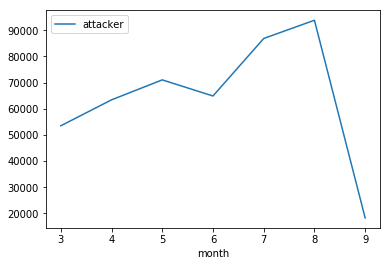

In [67]:
a = data.groupby('month')['attacker'].sum().reset_index()
a.plot(x='month',y='attacker',kind='line')

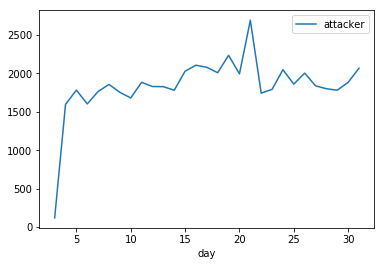

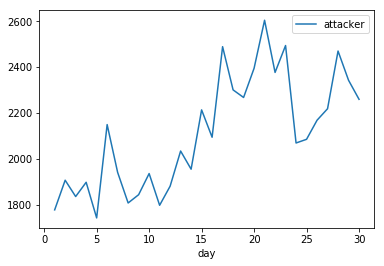

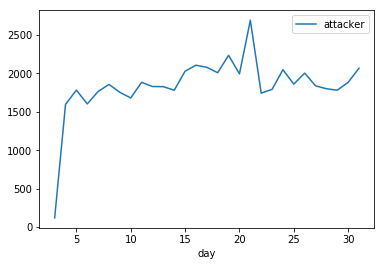

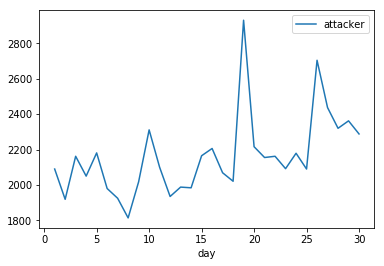

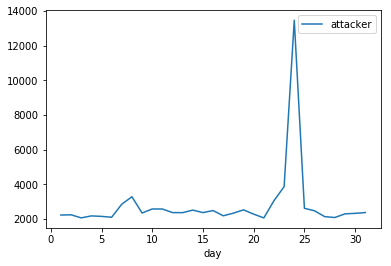

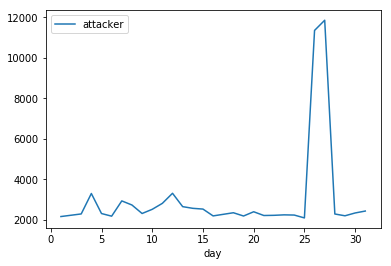

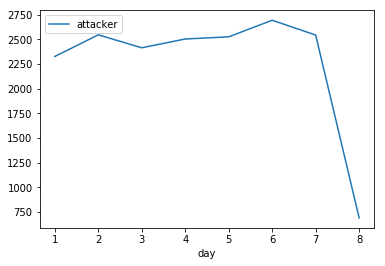

In [74]:
data_month3 = data.loc[data['month']==3,('day','attacker')]
a3 = data_month3.groupby('day')['attacker'].sum().reset_index()
a3.plot(x='day',y='attacker',kind='line')

data_month4 = data.loc[data['month']==4,('day','attacker')]
a4 = data_month4.groupby('day')['attacker'].sum().reset_index()
a4.plot(x='day',y='attacker',kind='line')

data_month5 = data.loc[data['month']==5,('day','attacker')]
a5 = data_month3.groupby('day')['attacker'].sum().reset_index()
a5.plot(x='day',y='attacker',kind='line')

data_month6 = data.loc[data['month']==6,('day','attacker')]
a6 = data_month6.groupby('day')['attacker'].sum().reset_index()
a6.plot(x='day',y='attacker',kind='line')

data_month7 = data.loc[data['month']==7,('day','attacker')]
a7 = data_month7.groupby('day')['attacker'].sum().reset_index()
a7.plot(x='day',y='attacker',kind='line')

data_month8 = data.loc[data['month']==8,('day','attacker')]
a8 = data_month8.groupby('day')['attacker'].sum().reset_index()
a8.plot(x='day',y='attacker',kind='line')

data_month9 = data.loc[data['month']==9,('day','attacker')]
a9 = data_month9.groupby('day')['attacker'].sum().reset_index()
a9.plot(x='day',y='attacker',kind='line')

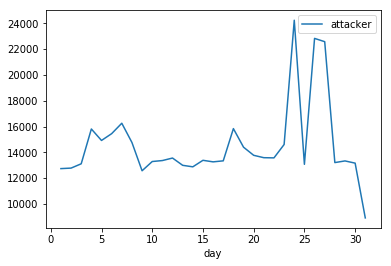

In [75]:
a3 = data.groupby('day')['attacker'].sum().reset_index()
a3.plot(x='day',y='attacker',kind='line')

## Hypothesis 1
avarage number of attack happening in the first half of a month is less then the avarage number of attacks happening in the second of the the month
<br>
<br>
<b>fh_avg</b> : Avarage number of attach in first half of the month
<br>
<b>sh_avg</b> : Avarage number of attach in second half of the month
<br>
<br>
<b>Null Hypothesis:</b> fh_avg >= sh_avg
<br>
<b>Alternate Hypothesis:</b> fh_avg < sh_avg